# Hot Forming Simulation

In diesem Notebook wird die Simulation der thermodynamischen Vorgänge eines Hot-Forming Prozesses durchgeführt.
Folgende Schritte werden dazu durchgeführt:
- Daten einlesen
- Daten vorverarbeiten (inkl. Feature Extraction)
- Modell aufstellen
- Modell simulieren
- Modell-Prozessdaten vergleichen
- (Anomalieerkennung durchführen)

## Daten einlesen

In [1]:
# package imports
import pandas as pd # version ==1.0.3
import numpy as np # version ==1.18.1
import json
import matplotlib.pyplot as plt # version ==3.1.3
import scipy.signal as sci_sig # version ==1.4.1
from IPython.display import display # version ==7.13.0
import os

In [2]:
# read data
filename = 'PresseDaten_200605_1030-1430.csv'
filename = 'Sep_Batch51.csv'
#filename = 'Sep_Batch52.csv'

cwd = os.getcwd()
parent = os.path.abspath(os.path.join(cwd, os.pardir))
filepath = os.path.join(parent,'data','HotForming_Benteler_IEM',filename)
print(filepath)
df = pd.read_csv(filepath, delimiter=',')


# Umwandlung von Signalnamen in Klarnamen aus signaldictionary.json
signaldictionary = json.load(open('signaldictionary.json'))
df.rename(columns=signaldictionary, inplace=True) 

# Umwandlung der Zeitpunkte in Pandas Timestamps
df['time'] = pd.to_datetime(df['time']) 

# Ausgabe des Roh-Datensatzes (enthält viele NaNs, da die Messwerte zu unterschiedlichen Zeitpunkten geschrieben werden)
display(df.head(),df.describe())


/home/work/data/HotForming_Benteler_IEM/Sep_Batch51.csv


time  \
0 2020-09-02 10:03:00.006   
1 2020-09-02 10:03:00.028   
2 2020-09-02 10:03:00.091   
3 2020-09-02 10:03:00.157   
4 2020-09-02 10:03:00.175   

   Werkzeugkuehlung Fußraum_oben Oberwerkz Durchfl_[L/min]  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Paketzähler iO Presse Ausgang_[Stk]  Paketzähler Presse Eingang_[Stk]  \
0                                  NaN                               NaN   
1                                  NaN                               NaN   
2                                  NaN                               NaN   
3                                  NaN                               NaN   
4                                  NaN                               NaN   

   Werkzeugkuehlung Fußraum_oben Unterwerkz Temp_[°C]  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   Stösselkraft gesamt_[kN]  \
0                       NaN   
1                 12.317458   
2                       NaN   
3                       NaN   
4                       NaN   

   Werkzeugkuehlung Fußraum_oben Unterwerkz Durchfl_[L/min]  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                         206.217087          
4                                                NaN          

   Werkzeugkuehlung Fußraum_unten Unterwerkz Durchfl_[L/min]  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                         387.140289           
4                                                NaN           

   Presse Ist-Zuhaltezeit_[s]  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   

   Werkzeugkuehlung Fußraum_unten Oberwerkz Temp_[°C]  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                          15.517941    
4                                                NaN    

   Werkzeugkuehlung Fußraum_oben Oberwerkz Temp_[°C]  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                          15.409431   
4                                                NaN   

   Werkzeugkuehlung Vorlauf Temp_[°C]  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                           17.740887   

   Werkzeugkuehlung Fußraum_unten Unterwerkz Temp_[°C]  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                          15.420284     
4                                                NaN     

   Stösselposition gemittelt_[mm]  \
0                             NaN   
1                             NaN   
2                     2186.272461   
3                             NaN   
4                             NaN   

   Werkzeugkuehlung Fußr

Werkzeugkuehlung Fußraum_oben Oberwerkz Durchfl_[L/min]  \
count                                        1392.000000         
mean                                          248.194900         
std                                             0.316810         
min                                           247.192200         
25%                                           247.966934         
50%                                           248.203659         
75%                                           248.418869         
max                                           249.129044         

       Paketzähler iO Presse Ausgang_[Stk]  Paketzähler Presse Eingang_[Stk]  \
count                             8.000000                          8.000000   
mean                           1119.375000                       1127.375000   
std                               2.263846                          2.263846   
min                            1116.000000                       1124.000000   
25%                            1117.750000                       1125.750000   
50%                            1119.500000                       1127.500000   
75%                            1121.250000                       1129.250000   
max                            1122.000000                       1130.000000   

       Werkzeugkuehlung Fußraum_oben Unterwerkz Temp_[°C]  \
count                                         562.000000    
mean                                           17.492328    
std                                             1.804209    
min                                            15.630062    
25%                                            15.685220    
50%                                            16.854382    
75%                                            19.358181    
max                                            20.758823    

       Stösselkraft gesamt_[kN]  \
count               1486.000000   
mean                2268.658371   
std                 4534.974973   
min                 -170.458527   
25%                   -0.215274   
50%                   16.097046   
75%                   24.553043   
max                11539.450195   

       Werkzeugkuehlung Fußraum_oben Unterwerkz Durchfl_[L/min]  \
count                                        1357.000000          
mean                                          206.691600          
std                                             0.284190          
min                                           206.023407          
25%                                           206.475327          
50%                                           206.669022          
75%                                           206.905746          
max                                           207.615921          

       Werkzeugkuehlung Fußraum_unten Unterwerkz Durchfl_[L/min]  \
count                                        1425.000000           
mean                                          387.715824           
std                                             0.529600           
min                                           386.214905           
25%                                           387.355499           
50%                                           387.678314           
75%                                           388.087189           
max                                           389.529083           

       Presse Ist-Zuhaltezeit_[s]  \
count                   71.000000   
mean                     5.015408   
std                      3.324042   
min                      0.000000   
25%                      2.242520   
50%                      5.033818   
75%                      7.900127   
max                     10.000411   

       Werkzeugkuehlung Fußraum_unten Oberwerkz Temp_[°C]  \
count                                         569.000000    
mean                                           16.976115    
std                                             1.404357    
min                           

## Daten vorverarbeiten

In [5]:
## Main DataFrame preparation
# Finding peaks
peak_idx,_ = sci_sig.find_peaks(df['Presse Ist-Zuhaltezeit_[s]'].dropna()) # get local peak indexes
peak_df_idx = df['Presse Ist-Zuhaltezeit_[s]'].dropna().iloc[peak_idx].index # get global peak indexes
df_peak = df.loc[peak_df_idx,['time','Presse Ist-Zuhaltezeit_[s]']] # create new dataframe from global indexes

# Calculate waittime
df_peak['waittime'] = df_peak['time'].diff()
df_peak['waittime'] = [time_delta.total_seconds() for time_delta in df_peak['waittime']]
df_peak.loc[peak_df_idx[0],'waittime'] = 0

# Sort products into batches
maximum_waittime = 80
df_peak['batch'] = np.where(df_peak['waittime'] > maximum_waittime,1,np.nan)
df_peak['batch'] = df_peak['batch'].cumsum() # Assigning batch numbers
df_peak.loc[peak_df_idx[0],'batch'] = 0 # write initial batch number 0

df_peak['batch'] = df_peak['batch'].fillna(method='ffill') # fill nan with batch number

df_peak['batch_size'] = df_peak.groupby('batch')['batch'].transform('count') # add 'batch_size' column

# Merge df_peaks to df
df = df.merge(df_peak,how='left',on=['time','Presse Ist-Zuhaltezeit_[s]'])


In [6]:
## Stamp and Wait times extraction

# resample, round, dropna
df_periods = df[['time','waittime','batch','batch_size']].resample('100ms',on='time').mean().round(1).dropna() 
df_periods.index = pd.to_datetime(df_periods.index)

# search for suitable batch
#print(df_periods[(df_periods['waittime']>80) & (df_periods['batch_size']>0)])

# strip down to selected batch
selected_batch = 0
df_periods = df_periods[df_periods['batch']==selected_batch]

# wait and stamp process start times
wait_start = df_periods.index
stamp_start = wait_start - np.timedelta64(10,'s') # stampin starts 10 seconds before waiting
stamp_init_time = stamp_start[0]
wait_ending_time = wait_start[-1]

# set init stamp time to zero
stamp_start = stamp_start - stamp_init_time
wait_start = wait_start - stamp_init_time

# converting to total seconds numpy array
stamp_start = stamp_start.total_seconds().to_numpy()
wait_start = wait_start.total_seconds().to_numpy()
print(f'\nBatch duration from {stamp_init_time} to {wait_ending_time}.')



Batch duration from 2020-09-02 10:04:46.400000 to 2020-09-02 10:06:39.100000.


<AxesSubplot:xlabel='time'>

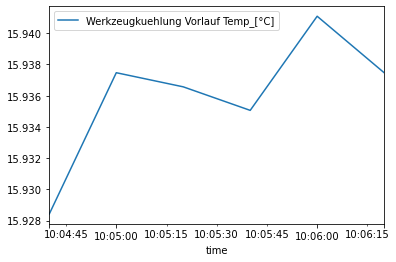

In [7]:
## Cooling intake preparation
signals = ['time','Werkzeugkuehlung Vorlauf Temp_[°C]']

df_cool_in = df[(df['time']>=stamp_init_time) & (df['time']<=wait_ending_time)][signals]

# resample, interpolate, fillna
df_cool_in = df_cool_in.resample('20s',on='time').mean().interpolate(method='time').fillna(method='bfill')
df_cool_in = df_cool_in.add(-2.1) # Correction of -3 Kelvin value shift

# Ausgabe des vorverarbeiteten Datensatzes
#display(df_cool_in.describe()) 
df_cool_in.plot()


In [8]:
## Cooling flow rate preparation
signals = ['time',
           'Werkzeugkuehlung Fußraum_oben Oberwerkz Durchfl_[L/min]',
           'Werkzeugkuehlung Fußraum_oben Unterwerkz Durchfl_[L/min]']
df_cool_flow = df[(df['time']>stamp_init_time) & (df['time']<=wait_ending_time)][signals]

# resample, interpolate, round
df_cool_flow = df_cool_flow.resample('10s',on='time').mean().interpolate(method='time').round(2)

# Check variance (Should be below 0.2 to use the mean values only)
display(df_cool_flow.describe())

# output of mean values; Value Drop at beginning will be ignored
cool_flow_mean_upper,cool_flow_mean_lower = df_cool_flow.iloc[5:,:].mean().round(1) 
print(f'Mean cooling flow rates:\nupper:{cool_flow_mean_upper} [L/min]\nlower:{cool_flow_mean_lower} [L/min]')


Werkzeugkuehlung Fußraum_oben Oberwerkz Durchfl_[L/min]  \
count                                          12.000000         
mean                                          248.300833         
std                                             0.195330         
min                                           247.830000         
25%                                           248.235000         
50%                                           248.310000         
75%                                           248.372500         
max                                           248.600000         

       Werkzeugkuehlung Fußraum_oben Unterwerkz Durchfl_[L/min]  
count                                          12.000000         
mean                                          206.845833         
std                                             0.190189         
min                                           206.420000         
25%                                           206.727500         
50%                                           206.900000         
75%                                           207.005000         
max                                           207.060000

Mean cooling flow rates:
upper:248.4 [L/min]
lower:207.0 [L/min]


Werkzeugkuehlung Fußraum_oben Oberwerkz Temp_[°C]  \
time                                                                         
2020-09-02 10:04:46.440                                               15.6   
2020-09-02 10:04:46.450                                               15.6   
2020-09-02 10:04:46.460                                               15.6   
2020-09-02 10:04:46.470                                               15.6   
2020-09-02 10:04:46.480                                               15.6   

                         Werkzeugkuehlung Fußraum_oben Unterwerkz Temp_[°C]  
time                                                                         
2020-09-02 10:04:46.440                                              15.79   
2020-09-02 10:04:46.450                                              15.79   
2020-09-02 10:04:46.460                                              15.79   
2020-09-02 10:04:46.470                                              15.79   
2020-09-02 10:04:46.480                                              15.79

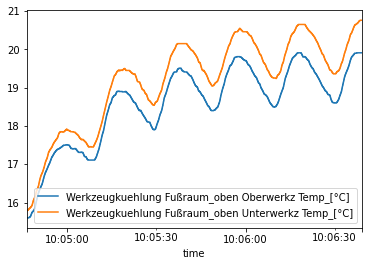

In [9]:
## Cooling out data time shift correction
signals = ['time',
          'Werkzeugkuehlung Fußraum_oben Oberwerkz Temp_[°C]',
           'Werkzeugkuehlung Fußraum_oben Unterwerkz Temp_[°C]']
df_cool_out = df[(df['time']>stamp_init_time)][signals]

# resample, interpolate, round
df_cool_out = df_cool_out.resample('10ms',on='time').mean().interpolate(method='time').round(2)

# wipe out time shift in signals
df_cool_out[signals[1]] = df_cool_out[signals[1]].shift(-4000,freq='ms') # Totzeit upper:4sec
df_cool_out[signals[2]] = df_cool_out[signals[2]].shift(-7000,freq='ms') # Totzeit lower:7sec

# crop to batch end time
df_cool_out = df_cool_out[df_cool_out.index<=wait_ending_time]

# get cooling start temperatures for simulation
cool_temp_start_upper,cool_temp_start_lower = df_cool_out.iloc[0,:]

df_cool_out.plot()
df_cool_out.head()

## Modell aufstellen

In [10]:
## Aufstellen des State-Space-Models

# Material constants (global variables)
cSteel=480 #J/KgK
pSteel=7850 #Kg/m3
cpWater=4184 #J/(Kg*K)

# define simulation parameter
kwargs_sim = dict(
    #Wärmekapazizäten Platine, Werkzeuge
    Cpl=15826,
    Cw1=37680,
    Cw2=753600/21, # Einstellen von CW2 ermöglicht das Erhöhen/Absenken der Amplitude des Kühlwasser, ohne den Mittelwert zu verändern
    Cw3=7536000,
    Cw1u=37680, #unten
    Cw2u=753600/20,
    Cw3u=7536000,

    # Heat resistances
    # upper tool half
    Rplwz = 0.0003, #Übergangswiderstand Platine und WZ1
    R1 = 0.0006, # Platine und WZ1
    R2 = 0.00075, # WZ1 und WZ2
    R4 = 0.006, # WZ2 und WZ3 starker Einfluss auf "AUFSCHWINGVERHALTEN" 
    R5 = 0.27, #WZ1 und Luft für den Umformschritt und für die Warteposition
    R5Waiting = 0.0003,
    R6=0.0013, #Wz2 und Luft
    R7=0.00013, #Wz3 und Luft
    
    #lower tool half
    R1u=0.0006, 
    R2u=0.00075,
    R4u = 0.006,
    R5u = 0.27,
    R5uWaiting = 0.0003,
    R6u=0.0013,
    R7u=0.00013
    )

def define_sys_models(Cpl,Cw1,Cw2,Cw3,Cw1u,Cw2u,Cw3u,Rplwz,R1,R2,R4,R5,R5Waiting,R6,R7,R1u,R2u,R4u,R5u,R5uWaiting,R6u,R7u):
    
    # Cooling mass flow rate (conversion to kg/s)
    mw_dot_upper = cool_flow_mean_upper/60 # kg/s
    mw_dot_lower = cool_flow_mean_lower/60 # kg/s

    M_upper = mw_dot_upper * cpWater * 0.1 # (1-exp(-L/L_t))
    M_lower = mw_dot_lower * cpWater * 0.1 # (1-exp(-L/L_t))

    # State-Space-Definition    
    #erste line:
    A11=(-1/Cpl)*((1/R1)+(1/R1u))# Platine #hier stand vorher R5 drin
    A11Waiting=0
    A12=(1/(Cpl*R1))
    A12Waiting=0
    A13=(1/(Cpl*R1u))
    A13Waiting=0
    A14=0
    A15=0
    A16=0
    A17=0
    
    #zweite line:
    A21=(1/(Cw1*R1)) #platine
    A21Waiting=0
    A22=(-1/Cw1)*((1/R1)+(1/R2)+(1/R5)) #Tw1
    A22Waiting=(-1/Cw1)*((1/R2)+(1/(R5Waiting))) #Tw1
    A23=0#Tw1u
    A24=(1/Cw1)*(1/R2)#Tw2
    A25=0#Tw2u
    A26=0#Tw3
    A27=0#Tw3u
    
    #dritte line:
    A31=(1/(Cw1u*R1u))
    A31Waiting=0
    A32=0
    A33=(-1/Cw1u)*((1/R1u)+(1/R2u)+(1/R5u)) #Tw1u
    A33Waiting=(-1/Cw1u)*((1/R2u)+(1/(R5uWaiting))) #Tw1u
    A34=0
    A35=(1/Cw1u)*(1/R2u) #Tw2u
    A36=0
    A37=0
    
    #vierte line:
    A41=0
    A42=(1/Cw2)*(1/R2) #Tw1
    A43=0#Tw1u
    A44=(-1/Cw2)*((1/R2)+M_upper+(1/R4)+(1/R6))#Tw2
    A45=0
    A46=(1/(Cw2*R4))#Tw3
    A47=0#Tw3u
    
    #fünfte line:
    A51=0
    A52=0
    A53=(1/Cw2u)*(1/R2u) #Tw1u
    A54=0#Tw2
    A55=(-1/Cw2u)*((1/R2u)+M_lower+(1/R4u)+(1/R6u))#Tw2u
    A56=0
    A57=(1/(Cw2u*R4u))#Tw3u
    
    #sechste line:
    A61=0
    A62=0
    A63=0 #Tw1u
    A64=(1/(Cw3*R4))#Tw2
    A65=0#Tw2u
    A66=(-1/Cw3)*((1/R4)+(1/R7))#Tw3
    A67=0#Tw3u
    
    #siebte line:
    A71=0
    A72=0
    A73=0 #Tw1u
    A74=0#Tw2
    A75=(1/(Cw3u*R4u))#Tw2u
    A76=0#Tw3
    A77=(-1/Cw3u)*((1/R4u)+(1/R7u))#Tw3u

    A_stamping = np.array([[A11,A12,A13,A14,A15,A16,A17],
                [A21,A22,A23,A24,A25,A26,A27],
                [A31,A32,A33,A34,A35,A36,A37],
                [A41,A42,A43,A44,A45,A46,A47],
                [A51,A52,A53,A54,A55,A56,A57],
                [A61,A62,A63,A64,A65,A66,A67],
                [A71,A72,A73,A74,A75,A76,A77]])

    A_waiting = np.array([[A11Waiting,A12Waiting,A13Waiting,A14,A15,A16,A17],
                [A21Waiting,A22Waiting,A23,A24,A25,A26,A27],
                [A31Waiting,A32,A33Waiting,A34,A35,A36,A37],
                [A41,A42,A43,A44,A45,A46,A47],
                [A51,A52,A53,A54,A55,A56,A57],
                [A61,A62,A63,A64,A65,A66,A67],
                [A71,A72,A73,A74,A75,A76,A77]])

    B = np.array([[0,0,0],
                [0,0,(1/(R5*Cw1))],
                [0,0,(1/(R5u*Cw1u))],
                [(M_upper/Cw2),0,(1/(R6*Cw2))],
                [0,(M_lower/Cw2u),(1/(R6u*Cw2u))],
                [0,0,(1/(R7*Cw3))],
                [0,0,(1/(R7u*Cw3u))]])
    
    C=np.array([[1,0,0,0,0,0,0],
        [0,0,0,(M_upper/(mw_dot_upper*cpWater)),0,0,0],
                [0,0,0,0,(M_lower/(mw_dot_lower*cpWater)),0,0]])
    
    D=np.array([[0,0,0],
        [(1-(M_upper/(mw_dot_upper*cpWater))),0,0],
                [0,(1-(M_lower/(mw_dot_lower*cpWater))),0]])
    
    sys_stamping = sci_sig.StateSpace(A_stamping,B,C,D)
    sys_waiting = sci_sig.StateSpace(A_waiting,B,C,D)
    
    return sys_stamping,sys_waiting

#rescale_kwargs(*results.x)

sys_stamping,sys_waiting = define_sys_models(**kwargs_sim)

## Modell simulieren

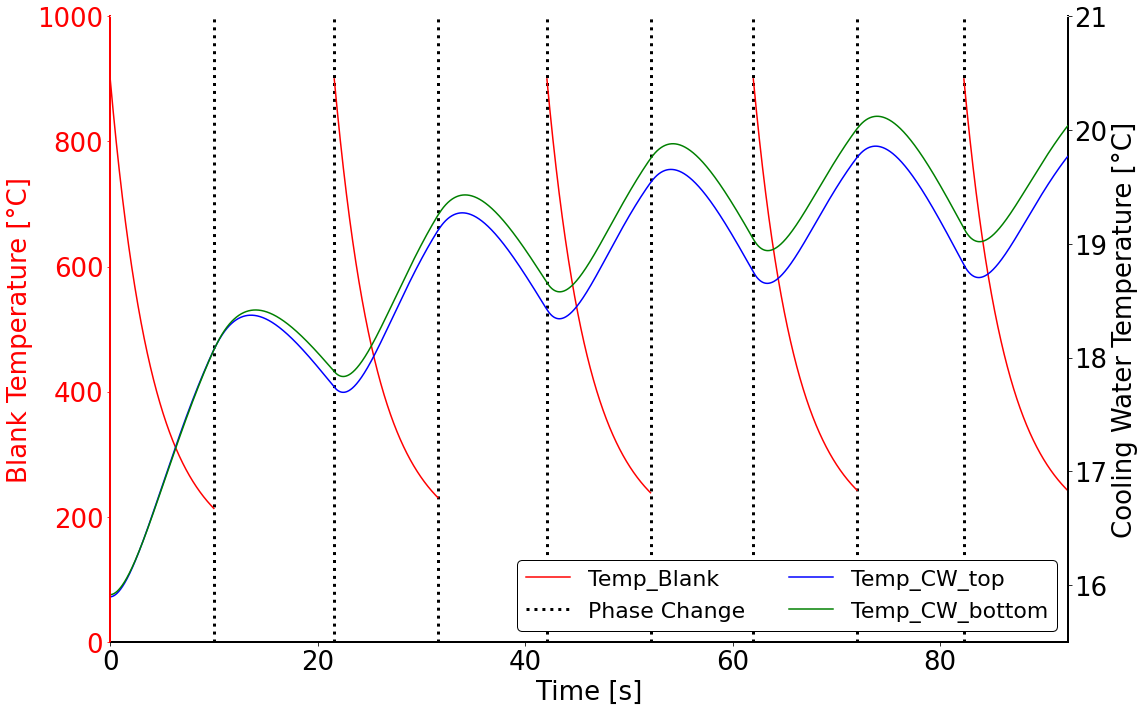

In [11]:
def simulate_model(n_steps,T_pl_start,sys_stamping,sys_waiting):
    if n_steps<1:
        raise ValueError(f"Argument 'n_steps' needs to be greater or equal t0 1, but is {n_steps}.")
        return
    
    sample = 1000 # Samplingrate für ODE Solver
    
    # initial values for step 1
    
    #Zustandsgrößen sind in Reihenfolge:
    #Platine
    #Werkzeug1 oben
    #Werkzeug1 unten
    #Werkzeug2 oben
    #Werkzeug2 unten
    #Werkzeug3 oben
    #Werkzeug3 unten
    
    xout=np.array([[T_pl_start,
                    cool_temp_start_upper,
                    cool_temp_start_lower,
                    cool_temp_start_upper,
                    cool_temp_start_lower,
                    cool_temp_start_upper,
                    cool_temp_start_lower]])
    
    for i in range(n_steps):
        if i>=len(stamp_start)-1:
            break # break out statement

        #stamp process
        Xinit = xout[-1,:] # Set last state values as initial values
        Xinit[0] = T_pl_start
        t=np.arange(0,wait_start[i]-stamp_start[i],0.01) # Pressing time (10sek)
        
        cool_in_start = df_cool_in.iloc[df_cool_in.index.get_loc(stamp_init_time+pd.Timedelta(seconds=stamp_start[i]), method='nearest')]
        cool_in_end = df_cool_in.iloc[df_cool_in.index.get_loc(stamp_init_time+pd.Timedelta(seconds=wait_start[i]), method='nearest')]
        u = np.linspace(cool_in_start,cool_in_end,len(t))
        u = np.c_[u,u,u]
        tout,yout,xout=sci_sig.lsim(sys_stamping,u,t,Xinit)

        if i==0: # initialization of record variables
            t_sim = tout + stamp_start[i]
            y_sim=yout
        else:
            y_sim = np.append(y_sim,yout,axis=0)
            t_sim = np.append(t_sim,tout+stamp_start[i])

        # wait process
        Xinit = xout[-1,:] # Set last state values as initial values
        Xinit[0] = 0 # set blank temperature to zero during waiting phase
        t=np.arange(0,stamp_start[i+1]-wait_start[i],0.01) # Waiting time
        cool_in_start = df_cool_in.iloc[df_cool_in.index.get_loc(stamp_init_time+pd.Timedelta(seconds=wait_start[i]), method='nearest')]
        cool_in_end = df_cool_in.iloc[df_cool_in.index.get_loc(stamp_init_time+pd.Timedelta(seconds=stamp_start[i+1]), method='nearest')]
        u = np.linspace(cool_in_start,cool_in_end,len(t))
        u = np.c_[u,u,u]
        tout,yout,xout=sci_sig.lsim(sys_waiting,u,t,Xinit)

        y_sim = np.append(y_sim,yout,axis=0)
        t_sim = np.append(t_sim,tout+wait_start[i])
    
    return (t_sim,y_sim)

# simulate model
n_steps = 5
T_pl_start = 900 # start temperature of blank
t_sim,y_sim = simulate_model(n_steps=n_steps, T_pl_start=T_pl_start, sys_stamping=sys_stamping, sys_waiting=sys_waiting)

# plot results
y_sim[y_sim==0] = np.nan # set zeros to nan for plotting
fs = 26 # fontsize
fig, ax1 = plt.subplots(figsize=(16,10))
lns1 = ax1.plot(t_sim,y_sim[:,0],label='Temp_Blank', color='r')
ax1.set_ylabel('Blank Temperature [°C]',size= fs, color='r')
ax1.set_xlabel('Time [s]',size= fs)
ax1.set_ylim([0, 1000])
ax1.tick_params(axis='y', colors='red',labelsize=fs)

ax1.vlines(x=wait_start[:n_steps-1],ymin=0,ymax=2000,color='k',linestyles='dotted',lw=3,label='Wait Start')
ax1.vlines(x=stamp_start[1:n_steps],ymin=0,ymax=2000,color='k',linestyles='dotted',lw=3)

lns4 = plt.plot(0,2,color='k',linestyle='dotted',label='Phase Change',lw=3)

ax2 = ax1.twinx()
lns2 = ax2.plot(t_sim,y_sim[:,1],label='Temp_CW_top', color='b')
lns3 = ax2.plot(t_sim,y_sim[:,2],label='Temp_CW_bottom', color='g')
ax2.set_ylim([15.5, 21])
ax2.set_xlim([0,wait_start[n_steps-1]])
ax2.set_ylabel('Cooling Water Temperature [°C]',size= fs)
ax2.spines['left'].set_color('r')
ax2.spines['top'].set_color('w')
ax1.spines['top'].set_color('w')
ax2.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y',labelsize=fs)
ax1.tick_params(axis='x',labelsize=fs)

# legend preparation
lns = lns1+lns4+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs,loc=4,prop={'size': fs-4},framealpha=1,edgecolor='black',facecolor='white',ncol=2)#,bbox_to_anchor=(0,0))

plt.tight_layout()
#plt.savefig('press_simulation.png')
plt.show()

## Modell-Prozessdaten vergleichen

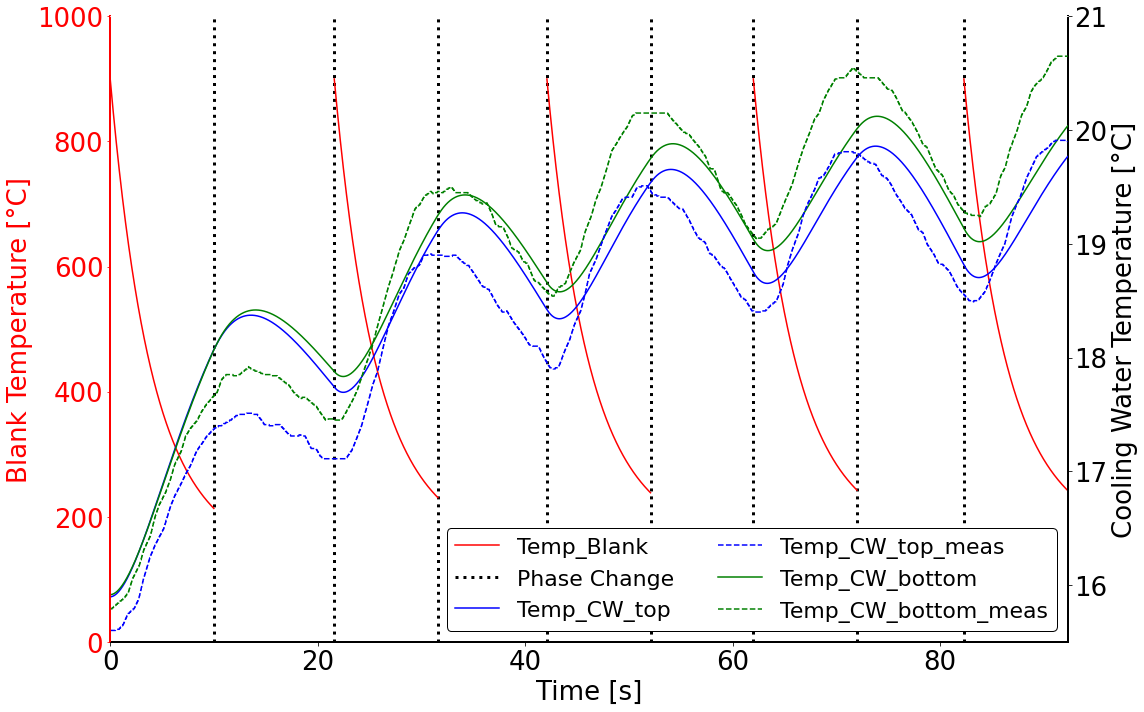

In [12]:
# plot results
y_sim[y_sim==0] = np.nan # set zeros to nan for plotting
fs = 26 # fontsize
fig, ax1 = plt.subplots(figsize=(16,10))
lns1 = ax1.plot(t_sim,y_sim[:,0],label='Temp_Blank', color='r')
ax1.set_ylabel('Blank Temperature [°C]',size= fs, color='r')
ax1.set_xlabel('Time [s]',size= fs)
ax1.set_ylim([0, 1000])
ax1.tick_params(axis='y', colors='red',labelsize=fs)

ax1.vlines(x=wait_start[:n_steps-1],ymin=0,ymax=2000,color='k',linestyles='dotted',lw=3,label='Wait Start')
ax1.vlines(x=stamp_start[1:n_steps],ymin=0,ymax=2000,color='k',linestyles='dotted',lw=3)
lns4 = plt.plot(0,0,color='k',linestyle='dotted',label='Phase Change',lw=3) # dummy line for Phase Change legend entry

ax2 = ax1.twinx()
lns2 = ax2.plot(t_sim,y_sim[:,1],label='Temp_CW_top', color='b')
lns3 = ax2.plot(t_sim,y_sim[:,2],label='Temp_CW_bottom', color='g')
ax2.set_ylim([15.5, 21])
ax2.set_xlim([0,wait_start[n_steps-1]])
ax2.set_ylabel('Cooling Water Temperature [°C]',size= fs)
ax2.spines['left'].set_color('r')
ax2.spines['top'].set_color('w')
ax1.spines['top'].set_color('w')
ax2.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y',labelsize=fs)
ax1.tick_params(axis='x',labelsize=fs)



y_measure = df_cool_out.loc[stamp_init_time:stamp_init_time+pd.Timedelta(seconds=stamp_start[n_steps])]
t_diff = len(y_sim)-len(y_measure)
y_measure = df_cool_out.loc[stamp_init_time:stamp_init_time+pd.Timedelta(seconds=stamp_start[n_steps]+0.01*t_diff)]
t_measure = (y_measure.index-y_measure.index[0]).total_seconds()
lns5 = plt.plot(t_measure,y_measure.iloc[:,0],linestyle='dashed',label='Temp_CW_top_meas', color='b')
lns6 = plt.plot(t_measure,y_measure.iloc[:,1],linestyle='dashed',label='Temp_CW_bottom_meas', color='g')

# legend preparation
lns = lns1+lns4+lns2+lns5+lns3+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs,loc=4,prop={'size': fs-4},framealpha=1,edgecolor='black',facecolor='white',ncol=2)
plt.tight_layout()
#plt.savefig('press_comparison.png')
plt.show()